In [ ]:
import pandas as pd


# Helper: find best epoch from log_history

def get_best_epoch_losses(trainer):
    log = trainer.state.log_history
    # Only logs with 'epoch' and either 'loss' or 'eval_loss'
    epoch_logs = [x for x in log if "epoch" in x]

    best_epoch = None
    best_metric = trainer.state.best_metric if trainer.state.best_metric else None

    # Find the epoch that corresponds to best_metric
    for entry in epoch_logs:
        # Some logs may have eval_loss / eval_accuracy / other metrics
        if best_metric is not None and any(v == best_metric for k, v in entry.items() if "eval" in k):
            best_epoch = int(entry["epoch"])
            break
    # If not found, take last epoch
    if best_epoch is None and len(epoch_logs) > 0:
        best_epoch = int(epoch_logs[-1]["epoch"])

    # Get training and validation loss from that epoch 
    training_loss = None
    validation_loss = None
    for entry in reversed(epoch_logs):
        if "eval_loss" in entry and validation_loss is None:
            validation_loss = entry["eval_loss"]
        if "loss" in entry and training_loss is None:
            training_loss = entry["loss"]
        if training_loss is not None and validation_loss is not None:
            break
    return best_epoch, training_loss, validation_loss


# Get best epochs and losses

best_epoch_clinical, train_loss_clinical, val_loss_clinical = get_best_epoch_losses(clinical_trainer)
best_epoch_mental, train_loss_mental, val_loss_mental = get_best_epoch_losses(mental_trainer)


#  Best Validation Performance 

table3 = pd.DataFrame({
    "Metric": [
        "Best Epoch",
        "Training Loss",
        "Validation Loss",
        "Accuracy",
        "Precision",
        "Recall",
        "Macro F1"
    ],
    "ClinicalBERT": [
        best_epoch_clinical,
        train_loss_clinical,
        val_loss_clinical,
        clinical_res["accuracy"],
        clinical_res["precision"],
        clinical_res["recall"],
        clinical_res["macro_f1"]
    ],
    "MentalBERT": [
        best_epoch_mental,
        train_loss_mental,
        val_loss_mental,
        mental_res["accuracy"],
        mental_res["precision"],
        mental_res["recall"],
        mental_res["macro_f1"]
    ]
})

print("\nTABLE III: Best Validation Performance: ClinicalBERT vs MentalBERT\n")
print(table3)


#  Class-wise F1 

class_names_ordered = list(label_map.keys())
table4 = pd.DataFrame({
    "Class": class_names_ordered,
    "ClinicalBERT": clinical_res["per_class_f1"],
    "MentalBERT": mental_res["per_class_f1"]
})

print("\nTABLE IV: Class-Wise F1-Score Comparison of ClinicalBERT and MentalBERT\n")
print(table4)


#  Final Performance Comparison (percentages)

def to_percent(x):
    return round(x * 100, 2)

table6 = pd.DataFrame({
    "Model": ["ClinicalBERT", "MentalBERT"],
    "Precision (%)": [to_percent(clinical_res["precision"]), to_percent(mental_res["precision"])],
    "Recall (%)": [to_percent(clinical_res["recall"]), to_percent(mental_res["recall"])],
    "Accuracy (%)": [to_percent(clinical_res["accuracy"]), to_percent(mental_res["accuracy"])],
    "F1-Score (%)": [to_percent(clinical_res["macro_f1"]), to_percent(mental_res["macro_f1"])]
})

print("\nTABLE VI: Final Performance Comparison of MentalBERT and ClinicalBERT\n")
print(table6)



TABLE III: Best Validation Performance: ClinicalBERT vs MentalBERT

            Metric  ClinicalBERT  MentalBERT
0       Best Epoch      5.000000    5.000000
1    Training Loss      0.728800    0.661600
2  Validation Loss      0.823466    0.801364
3         Accuracy      0.815799    0.835407
4        Precision      0.775170    0.803849
5           Recall      0.783349    0.813948
6         Macro F1      0.775790    0.807403

TABLE IV: Class-Wise F1-Score Comparison of ClinicalBERT and MentalBERT

                  Class  ClinicalBERT  MentalBERT
0               Anxiety      0.850331    0.862547
1               Bipolar      0.836957    0.856115
2            Depression      0.759298    0.781601
3                Normal      0.950989    0.960693
4  Personality disorder      0.641667    0.677824
5                Stress      0.652666    0.766551
6              Suicidal      0.738622    0.746491

TABLE VI: Final Performance Comparison of MentalBERT and ClinicalBERT

          Model  Precisio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/899.7 MB 3.1 MB/s eta 0:03:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39

tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/42434 [00:00<?, ? examples/s]

Map:   0%|          | 0/5304 [00:00<?, ? examples/s]

Map:   0%|          | 0/5305 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mental/mental-bert-base-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2498279886.py:155: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,Macro F1,Anxiety F1,Bipolar F1,Depression F1,Normal F1,Personality disorder F1,Stress F1,Suicidal F1
1,1.063000,0.884487,0.774698,0.739447,0.715941,0.712516,0.797531,0.763251,0.760102,0.944547,0.560386,0.614650,0.547146
2,0.805700,0.829185,0.808069,0.779722,0.760576,0.760227,0.833780,0.801418,0.779205,0.950280,0.600000,0.677467,0.679441
3,0.752200,0.812683,0.819382,0.778445,0.779981,0.777281,0.835249,0.811009,0.777461,0.959380,0.632479,0.712146,0.713246
4,0.715100,0.804966,0.826357,0.794624,0.790958,0.790789,0.850129,0.834244,0.772957,0.962420,0.640000,0.749153,0.726619
5,0.683800,0.801364,0.827866,0.795329,0.799048,0.796258,0.854246,0.846293,0.780408,0.960742,0.663830,0.746528,0.721763
6,0.661600,0.815030,0.824849,0.793889,0.795307,0.793005,0.860792,0.839640,0.782909,0.961705,0.660944,0.750424,0.694623


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/42434 [00:00<?, ? examples/s]

Map:   0%|          | 0/5304 [00:00<?, ? examples/s]

Map:   0%|          | 0/5305 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-2498279886.py:155: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,Macro F1,Anxiety F1,Bipolar F1,Depression F1,Normal F1,Personality disorder F1,Stress F1,Suicidal F1
1,1.177900,0.957590,0.741893,0.645932,0.630831,0.624828,0.717672,0.739965,0.722047,0.911739,0.216867,0.469925,0.595580
2,0.884700,0.850843,0.789404,0.747060,0.725334,0.727459,0.809399,0.763066,0.749263,0.939581,0.521277,0.614665,0.694963
3,0.821900,0.864048,0.786953,0.746599,0.738139,0.734161,0.813922,0.791506,0.744295,0.938443,0.576577,0.584958,0.689426
4,0.782700,0.862625,0.793175,0.756190,0.749545,0.747586,0.831551,0.812386,0.727469,0.932353,0.597285,0.615142,0.716915
5,0.752300,0.823466,0.809578,0.769088,0.770688,0.768563,0.848249,0.817360,0.753731,0.949636,0.612766,0.683849,0.714350
6,0.728800,0.838156,0.804676,0.759459,0.770811,0.762819,0.835279,0.812721,0.757636,0.946951,0.620690,0.667732,0.698727


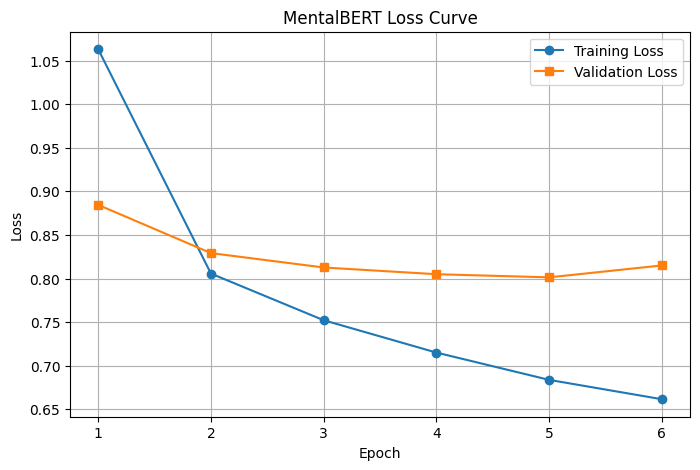

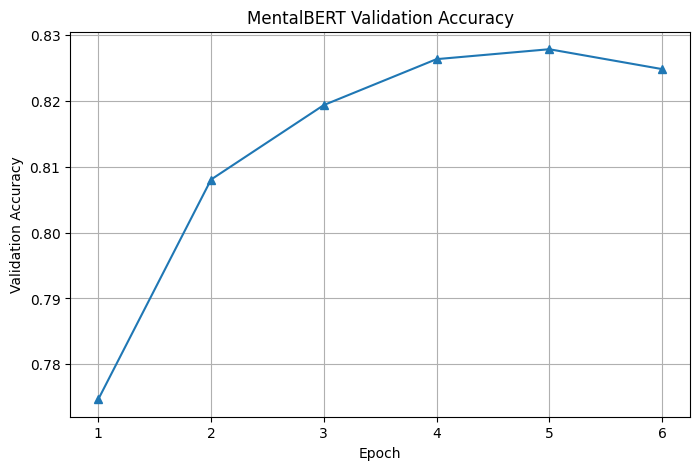

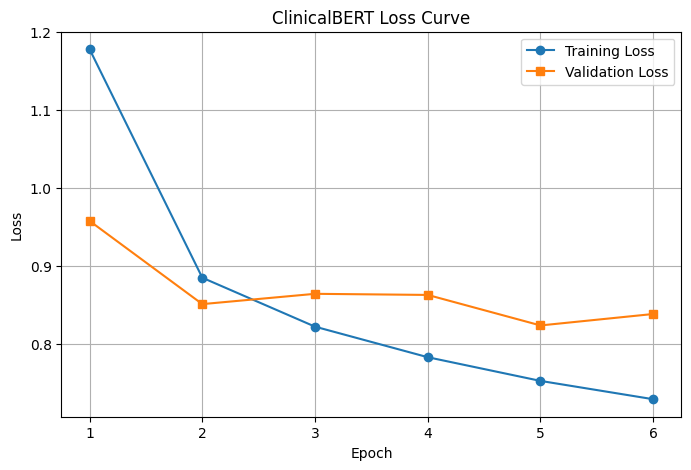

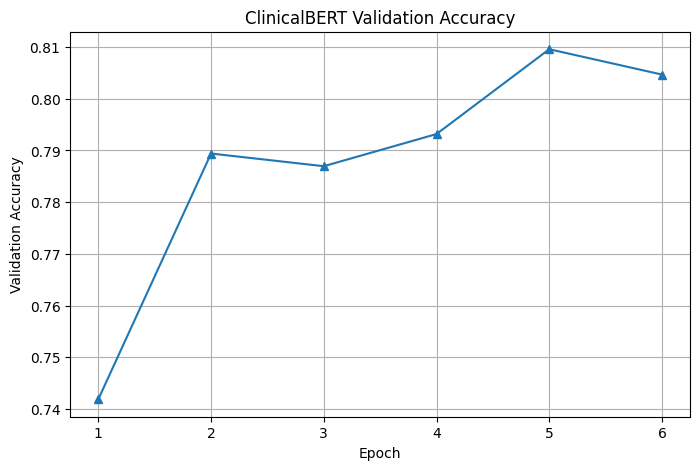

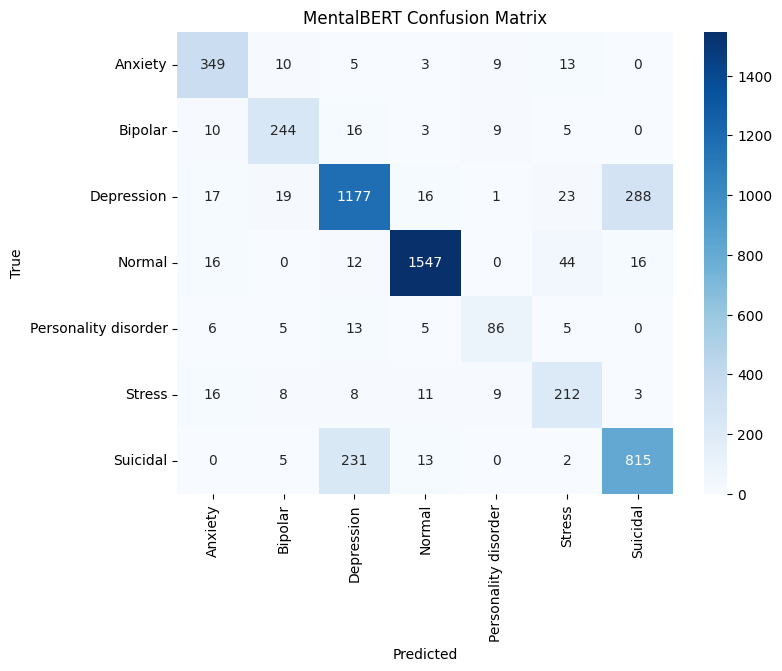

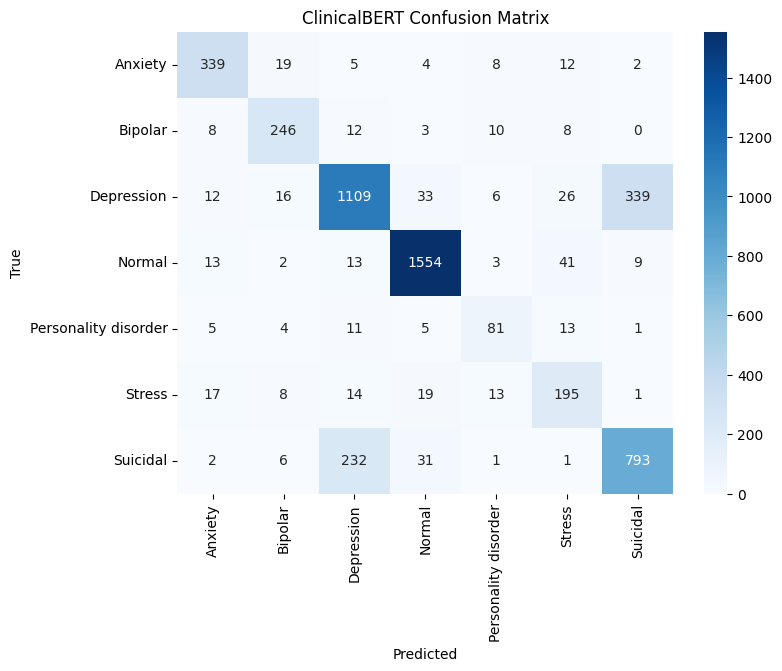


TABLE IV: Class-wise F1 Score

                       Class  ClinicalBERT  MentalBERT
0                 eval_macro      0.768563    0.796258
1               eval_Anxiety      0.848249    0.854246
2               eval_Bipolar      0.817360    0.846293
3            eval_Depression      0.753731    0.780408
4                eval_Normal      0.949636    0.960742
5  eval_Personality disorder      0.612766    0.663830
6                eval_Stress      0.683849    0.746528
7              eval_Suicidal      0.714350    0.721763


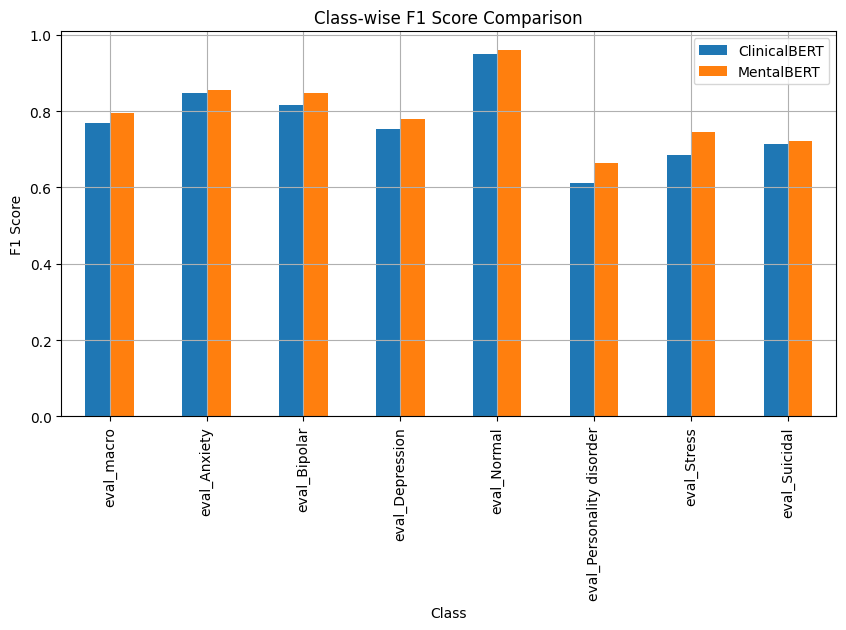

In [ ]:

# MENTALBERT vs CLINICALBERT 


!pip install -U transformers datasets torch scikit-learn seaborn matplotlib


# 1. Imports

import torch
import pandas as pd
import numpy as np
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# 2. Drive

drive.mount('/content/drive')


# 3. Load dataset

df = pd.read_csv("/content/drive/MyDrive/Combined Data.csv")
df["statement"] = df["statement"].astype(str)

label_map = {label: i for i, label in enumerate(sorted(df['status'].unique()))}
inv_label_map = {v: k for k, v in label_map.items()}
df["labels"] = df["status"].map(label_map)


# 4. Stratified split 

train_df, temp_df = train_test_split(
    df, test_size=0.2, stratify=df["labels"], random_state=42
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["labels"], random_state=42
)


# 5. TABLE II: Dataset Statistics

stats = []
for label, idx in label_map.items():
    stats.append([
        label,
        (train_df["labels"] == idx).sum(),
        (val_df["labels"] == idx).sum(),
        (test_df["labels"] == idx).sum(),
        (df["labels"] == idx).sum()
    ])

stats_df = pd.DataFrame(stats, columns=["Class", "Train", "Val", "Test", "Total"])
stats_df.loc["Total"] = ["Total",
    stats_df["Train"].sum(),
    stats_df["Val"].sum(),
    stats_df["Test"].sum(),
    stats_df["Total"].sum()
]

print("\nTABLE II: Dataset Statistics\n")
print(stats_df)


# 6. HF Datasets

train_ds = Dataset.from_pandas(train_df)
val_ds   = Dataset.from_pandas(val_df)
test_ds  = Dataset.from_pandas(test_df)


# 7. Metrics

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average="macro", zero_division=0
    )
    acc = accuracy_score(labels, preds)

    per_class_f1 = precision_recall_fscore_support(
        labels, preds, average=None, zero_division=0
    )[2]

    metrics = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "macro_f1": f1
    }

    for i, name in inv_label_map.items():
        metrics[f"{name}_f1"] = per_class_f1[i]

    return metrics


# 8. TrainingArguments 

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    warmup_ratio=0.1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=6,
    weight_decay=0.01,
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    fp16=torch.cuda.is_available(),
    label_smoothing_factor=0.1,
    report_to="none"
)


# 9. Train function

def train_model(model_ckpt):
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

    def tokenize(batch):
        return tokenizer(
            batch["statement"],
            padding="max_length",
            truncation=True,
            max_length=128
        )

    tr = train_ds.map(tokenize, batched=True)
    va = val_ds.map(tokenize, batched=True)
    te = test_ds.map(tokenize, batched=True)

    model = AutoModelForSequenceClassification.from_pretrained(
        model_ckpt,
        num_labels=len(label_map),
        hidden_dropout_prob=0.3,
        attention_probs_dropout_prob=0.3
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tr,
        eval_dataset=va,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(2)]
    )

    trainer.train()
    return trainer, te

mental_trainer, mental_test_tok = train_model("mental/mental-bert-base-uncased")
clinical_trainer, clinical_test_tok = train_model("emilyalsentzer/Bio_ClinicalBERT")


# 10. LOSS & ACCURACY PLOTS

def plot_loss(logs, title):
    epochs, tr_loss, val_loss = [], [], []

    for l in logs:
        if "loss" in l and "epoch" in l:
            epochs.append(l["epoch"])
            tr_loss.append(l["loss"])
        if "eval_loss" in l:
            val_loss.append(l["eval_loss"])

    plt.figure(figsize=(8,5))
    plt.plot(epochs, tr_loss, marker="o", label="Training Loss")
    plt.plot(epochs, val_loss, marker="s", label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(logs, title):
    epochs, acc = [], []
    for l in logs:
        if "eval_accuracy" in l:
            epochs.append(l["epoch"])
            acc.append(l["eval_accuracy"])

    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, marker="^")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_loss(mental_trainer.state.log_history, "MentalBERT Loss Curve")
plot_accuracy(mental_trainer.state.log_history, "MentalBERT Validation Accuracy")

plot_loss(clinical_trainer.state.log_history, "ClinicalBERT Loss Curve")
plot_accuracy(clinical_trainer.state.log_history, "ClinicalBERT Validation Accuracy")


# 11. CONFUSION MATRIX 

def plot_confusion(trainer, test_data, title):
    preds = trainer.predict(test_data)
    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(-1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=label_map.keys(),
        yticklabels=label_map.keys()
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

plot_confusion(mental_trainer, mental_test_tok, "MentalBERT Confusion Matrix")
plot_confusion(clinical_trainer, clinical_test_tok, "ClinicalBERT Confusion Matrix")


# 12. Class-wise F1 

def classwise_f1(trainer):
    res = trainer.evaluate()
    return {k.replace("_f1",""):v for k,v in res.items() if k.endswith("_f1")}

mental_f1 = classwise_f1(mental_trainer)
clinical_f1 = classwise_f1(clinical_trainer)

table4 = pd.DataFrame({
    "Class": mental_f1.keys(),
    "ClinicalBERT": clinical_f1.values(),
    "MentalBERT": mental_f1.values()
})

print("\nTABLE IV: Class-wise F1 Score\n")
print(table4)

table4.set_index("Class").plot(kind="bar", figsize=(10,5))
plt.ylabel("F1 Score")
plt.title("Class-wise F1 Score Comparison")
plt.grid(True)
plt.show()